<a href="https://colab.research.google.com/github/darkar18/style-interface/blob/main/latent_space_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sn
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import ImageFolder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/dataset/my_array(0-5k).csv'

In [4]:
import pandas as pd
df = pd.read_csv(path)

In [6]:

df.head(5)

,1.648808002471923828e+00,-1.315405368804931641e+00
0,-2.291883,-1.523765
1,-2.494960,1.544286
2,-4.864777,-1.642641
3,-4.305722,2.003069
4,-4.581419,-0.517930


In [7]:
path1="/content/drive/MyDrive/dataset/my_array(10k-15k).csv"

In [8]:
import pandas as pd

csvfile1 = pd.read_csv(path1)
csvfile1.head(5)

,1.616692185401916504e+00,-1.303225636482238770e+00
0,-1.992830,-1.388168
1,-2.368114,1.663617
2,-5.004101,-1.411286
3,-4.208627,2.307016
4,-6.015364,-0.924569


In [10]:
path2="/content/drive/MyDrive/dataset/my_array(15k-20k).csv"

In [11]:
import pandas as pd

csvfile2 = pd.read_csv(path2)
csvfile2.head(5)

,1.974566340446472168e+00,-1.704993128776550293e+00
0,-2.185322,-1.663621
1,-2.327631,2.130168
2,-4.788955,-1.345497
3,-4.044849,2.647680
4,-5.912296,-0.734881


In [12]:
path3="/content/drive/MyDrive/dataset/my_array(20k-60k).csv"

In [13]:
import pandas as pd

csvfile3= pd.read_csv(path3)
csvfile3.head(5)

,1.559868216514587402e+00,-1.420119643211364746e+00
0,-2.122282,-1.545177
1,-2.648183,1.498711
2,-4.844155,-1.425720
3,-4.135416,2.617344
4,-4.322495,-0.620450


In [14]:
path4="/content/drive/MyDrive/dataset/my_array(5k-10k).csv"

In [15]:
import pandas as pd

csvfile3= pd.read_csv(path4)
csvfile3.head(5)

,1.756836056709289551e+00,-1.685978651046752930e+00
0,-2.057244,-1.787644
1,-2.280659,1.981357
2,-4.755822,-1.451336
3,-4.087225,2.556984
4,-4.644352,-0.612514


In [17]:
df=pd.DataFrame(df)
np_array0 = df.to_numpy()

print(np_array0)

[[-2.29188347 -1.52376461]
 [-2.49495959  1.54428637]
 [-4.86477709 -1.64264071]
 ...
 [ 7.32612658 -5.95423985]
 [ 3.58703804 -2.09967065]
 [ 1.90652466  0.877864  ]]


In [18]:
df.columns

Index(['1.648808002471923828e+00', '-1.315405368804931641e+00'], dtype='object')

In [19]:
np_array0.shape

(935701, 2)

In [20]:
np_array0[0]

array([-2.29188347, -1.52376461])

In [24]:
df1=pd.DataFrame(csvfile1)
np_array1 = df1.to_numpy()

print(np_array1)

[[-1.9928298  -1.38816762]
 [-2.36811423  1.66361654]
 [-5.0041008  -1.41128647]
 ...
 [ 7.24260044 -5.86540747]
 [ 3.93193245 -2.31205058]
 [ 1.85101151  0.81749028]]


In [30]:
np_array1.shape

(935894, 2)

In [25]:
df2=pd.DataFrame(csvfile2)
np_array2 = df2.to_numpy()
print(np_array2)

[[-2.18532228 -1.66362131]
 [-2.32763147  2.13016796]
 [-4.78895521 -1.34549713]
 ...
 [ 7.41923761 -5.76707363]
 [ 3.62153983 -3.55864286]
 [ 1.99147725  0.7298488 ]]


In [33]:
np_array2.shape

(935787, 2)

In [31]:
df3=pd.DataFrame(csvfile3)
np_array3 = df3.to_numpy()
print(np_array3)

[[-2.05724382 -1.78764439]
 [-2.2806592   1.98135662]
 [-4.75582218 -1.45133615]
 ...
 [ 7.17857265 -6.2419858 ]
 [ 4.19116879 -2.20224166]
 [ 1.89437652  0.83589911]]


In [34]:
np_array3.shape

(936102, 2)

In [37]:
latent_representations=np.vstack((np_array0,np_array1,np_array2,np_array3))

In [38]:
latent_representations 


array([[-2.29188347, -1.52376461],
       [-2.49495959,  1.54428637],
       [-4.86477709, -1.64264071],
       ...,
       [ 7.17857265, -6.2419858 ],
       [ 4.19116879, -2.20224166],
       [ 1.89437652,  0.83589911]])

In [39]:
latent_representations.shape

(3743484, 2)

In [40]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(latent_representations)
print(reduced_vectors)

[[-2.29188196 -1.52376568]
 [-2.49495736  1.54428535]
 [-4.8647756  -1.64264118]
 ...
 [ 7.17857306 -6.24198908]
 [ 4.19117014 -2.20224425]
 [ 1.89437858  0.83589707]]


In [41]:
reduced_vectors.shape

(3743484, 2)

In [42]:
x_coords = [latent_vector[0] for latent_vector in reduced_vectors]
y_coords = [latent_vector[1] for latent_vector in reduced_vectors]

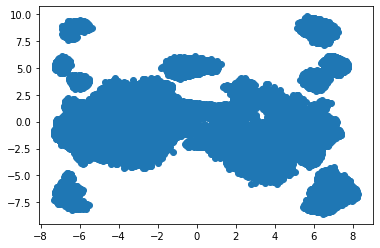

In [43]:
plt.scatter(x_coords, y_coords)


In [44]:
mean = np.mean(reduced_vectors, axis=0)
std = np.std(reduced_vectors, axis=0)
normalized_latent_space=(mean-reduced_vectors)/std


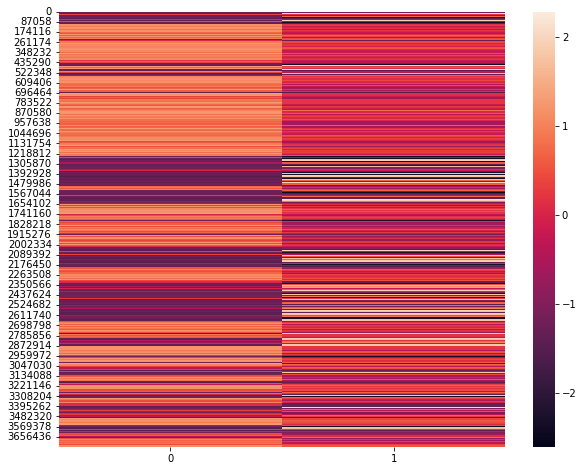

In [45]:

plt.figure(figsize=(10, 8))
h1=sn.heatmap(data=normalized_latent_space)

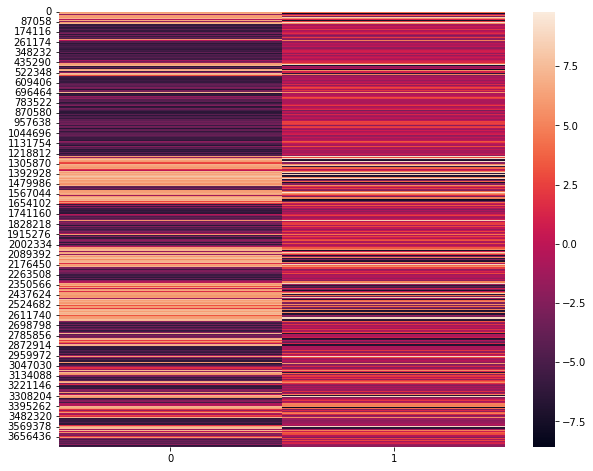

In [46]:
plt.figure(figsize=(10, 8))
hm = sn.heatmap(data = reduced_vectors)

In [47]:
new_min = -1
new_max = 1
current_min = np.min(reduced_vectors)
current_max = np.max(reduced_vectors)

In [48]:
scaled_latent_space = ((reduced_vectors - current_min) / (current_max - current_min)) * (new_max - new_min) + new_min
np.save('scaled_latent_space.npy', scaled_latent_space)

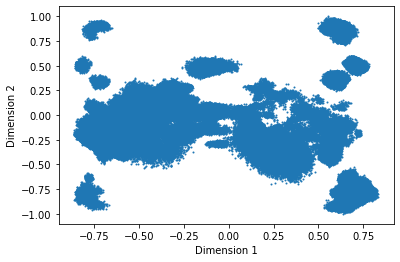

In [49]:
scaled_latent_space = np.load('scaled_latent_space.npy')

# Plot the first two dimensions of the scaled latent space
plt.scatter(scaled_latent_space[:, 0], scaled_latent_space[:, 1], s=1)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [50]:
translation = np.array([0.5, 0.5])
translated_latent_space = scaled_latent_space + translation
np.save('translated_latent_space.npy', translated_latent_space)

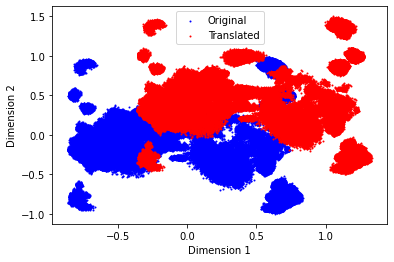

In [51]:
plt.scatter(scaled_latent_space[:, 0], scaled_latent_space[:, 1], s=1, c='blue', label='Original')
plt.scatter(translated_latent_space[:, 0], translated_latent_space[:, 1], s=1, c='red', label='Translated')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [52]:
theta = np.pi / 4

# Define rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

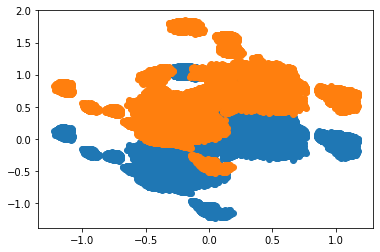

In [53]:
rotated_latent_space = np.dot(R, scaled_latent_space.T).T
rotated_latent_space1 = np.dot(R, translated_latent_space.T).T


# Plot rotated latent space
import matplotlib.pyplot as plt

plt.scatter(rotated_latent_space[:, 0], rotated_latent_space[:, 1])
plt.scatter(rotated_latent_space1[:, 0], rotated_latent_space1[:, 1])
plt.show()





In [54]:
start_point = rotated_latent_space[0]
end_point = rotated_latent_space[100]

start_point1 = rotated_latent_space1[0]
end_point1 = rotated_latent_space1[100]

# Define number of interpolation steps
n_steps = 10

# Perform latent space interpolation
interpolated_points = np.zeros((n_steps, rotated_latent_space.shape[1]))
for i in range(n_steps):
    t = i / (n_steps - 1)
    interpolated_points[i] = start_point + t * (end_point - start_point)

interpolated_points1 = np.zeros((n_steps, rotated_latent_space1.shape[1]))
for i in range(n_steps):
    t = i / (n_steps - 1)
    interpolated_points1[i] = start_point + t * (end_point - start_point)


In [66]:
for i in range(len(rotated_latent_space)-1):
  start_point = rotated_latent_space[i]
  end_point = rotated_latent_space[i+1]
  n_steps = 10
  interpolated_points = np.zeros((n_steps, rotated_latent_space.shape[1]))
  for i in range(n_steps):
    t = i / (n_steps - 1)
    interpolated_points[i] = start_point + t * (end_point - start_point)


     

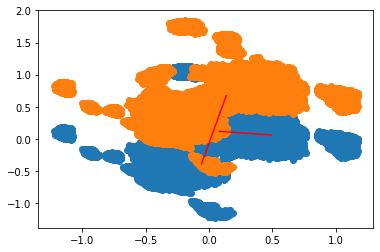

In [67]:
plt.scatter(rotated_latent_space[:, 0], rotated_latent_space[:, 1])
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'r')

plt.scatter(rotated_latent_space1[:, 0], rotated_latent_space1[:, 1])
plt.plot(interpolated_points1[:, 0], interpolated_points1[:, 1], 'r')
plt.show()





In [61]:

class MappingNetwork(nn.Module):
    def __init__(self, z_dim=3743484, w_dim=2, num_layers=8):
        super(MappingNetwork, self).__init__()
        
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(z_dim, w_dim))
        self.layers.append(nn.LeakyReLU(0.2))
        for i in range(num_layers-2):
            self.layers.append(nn.Linear(w_dim, w_dim))
            self.layers.append(nn.LeakyReLU(0.2))
        self.layers.append(nn.Linear(w_dim, w_dim))
        
    def forward(self, z):
        w = z
        for layer in self.layers:
            w = layer(w)
        return w


mapping_network = MappingNetwork()


In [62]:
z_rotated_tensor = torch.from_numpy(rotated_latent_space)
z_rotated_tensor,z_rotated_tensor.shape

(tensor([[-0.0591, -0.3873],
         [-0.3110, -0.1667],
         [-0.2481, -0.5945],
         ...,
         [ 1.0332, -0.0214],
         [ 0.4922,  0.0596],
         [ 0.0815,  0.1167]], dtype=torch.float64), torch.Size([3743484, 2]))

In [63]:
y=z_rotated_tensor.t()

In [64]:
import torch
z = torch.randn((2, 3743484))
print(z.dtype)
w = mapping_network(y.to(z.dtype)) 



torch.float32


In [65]:
w

tensor([[ 0.0977, -0.2049],
        [ 0.0978, -0.2049]], grad_fn=<AddmmBackward0>)